# Aim: To build a Machine learning model that can predict if an existing customer is more likely to buy a new car using KNN


## 0.Import Packages

In [2]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## 1. Load data 

In [3]:
data = pd.read_csv("C:\\Users\\shiva\\Downloads\\repurchase_dataset.csv")

## 2. Explore dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

In [5]:
data.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


In [6]:
data.tail()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
131332,154134,1,NaN,NaN,model_3,Large/SUV,7,10,10,9,10,10,10,3,6,10,10
131333,154135,1,NaN,NaN,model_3,Large/SUV,4,10,10,10,10,10,10,2,3,10,10
131334,154137,1,NaN,NaN,model_5,Large/SUV,4,4,9,5,4,3,8,4,7,10,10
131335,154138,1,NaN,NaN,model_5,Large/SUV,2,1,10,1,10,9,8,3,6,7,10
131336,154139,1,NaN,NaN,model_1,LCV,6,1,7,1,10,10,5,3,4,9,10


In [7]:
data.describe()

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
print("Number of rows", data.shape[0])
print("Number of columns", data.shape[1])

Number of rows 131337
Number of columns 17


In [9]:
print(data.dtypes)

ID                            int64
Target                        int64
age_band                     object
gender                       object
car_model                    object
car_segment                  object
age_of_vehicle_years          int64
sched_serv_warr               int64
non_sched_serv_warr           int64
sched_serv_paid               int64
non_sched_serv_paid           int64
total_paid_services           int64
total_services                int64
mth_since_last_serv           int64
annualised_mileage            int64
num_dealers_visited           int64
num_serv_dealer_purchased     int64
dtype: object


## 3. Explore Target Variable 

In [10]:
target = 'Target'

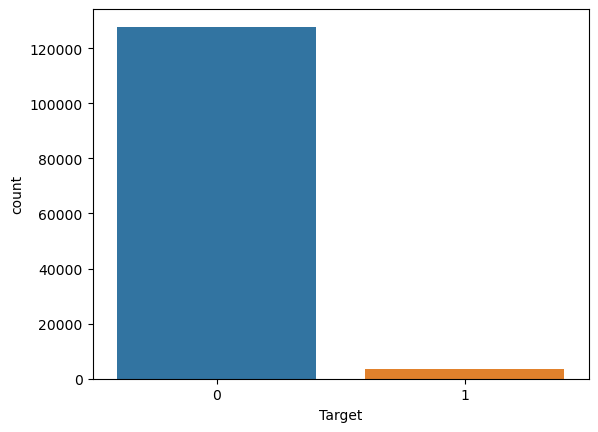

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# count plot on single categorical variable
sns.countplot(x =target, data = data)

# Show the plot
plt.show()

## 4. Explore variable of interest 

### Numerical Features 

In [13]:
# Compute summary statistics for numerical features
numerical_summary = data.describe().transpose()
numerical_summary


,count,mean,std,min,25%,50%,75%,max
ID,131337.0,77097.384180,44501.636704,1.0,38563.0,77132.0,115668.0,154139.0
Target,131337.0,0.026809,0.161525,0.0,0.0,0.0,0.0,1.0
age_of_vehicle_years,131337.0,5.493022,2.843299,1.0,3.0,5.0,8.0,10.0
sched_serv_warr,131337.0,5.452500,2.884328,1.0,3.0,5.0,8.0,10.0
non_sched_serv_warr,131337.0,5.472517,2.870665,1.0,3.0,5.0,8.0,10.0
sched_serv_paid,131337.0,5.452287,2.886528,1.0,3.0,5.0,8.0,10.0
non_sched_serv_paid,131337.0,5.497050,2.878699,1.0,3.0,5.0,8.0,10.0
total_paid_services,131337.0,5.481692,2.880408,1.0,3.0,5.0,8.0,10.0
total_services,131337.0,5.454967,2.875961,1.0,3.0,5.0,8.0,10.0
mth_since_last_serv,131337.0,5.469807,2.859756,1.0,3.0,5.0,8.0,10.0


##### Exploring numerical features 

In [14]:
# Selecting numerical features
numerical_features = data.select_dtypes(include=['int64'])

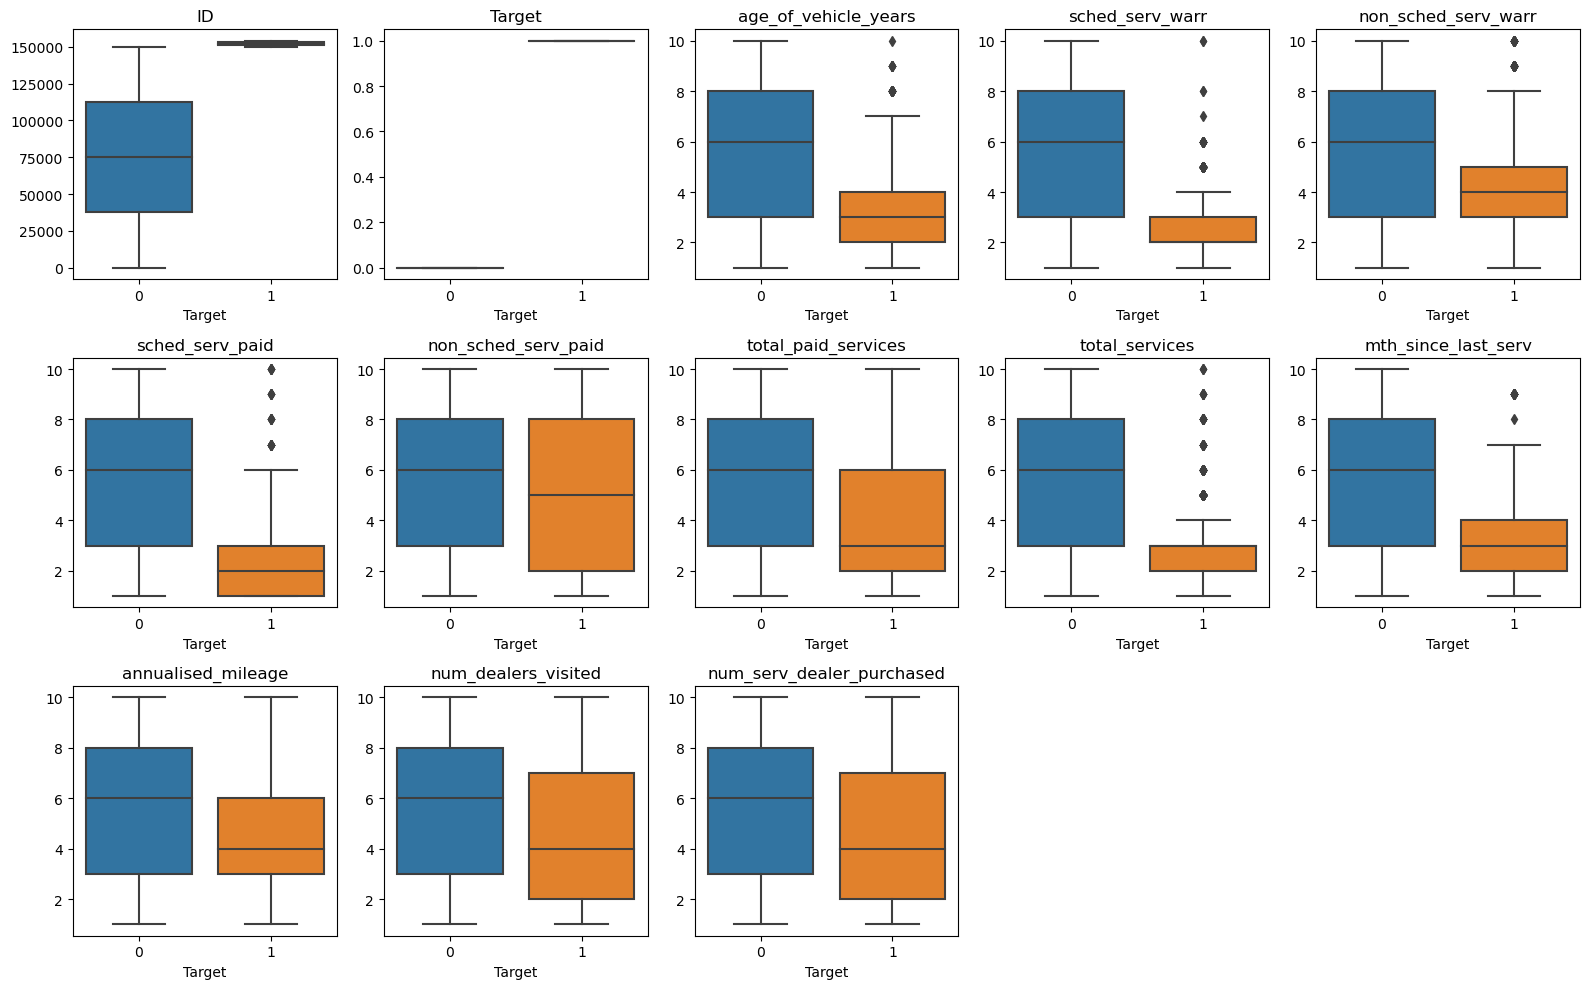

In [15]:
# Plotting boxplots for numerical features
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_features.columns):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(data=data, x='Target', y=col)
    plt.title(col)
    plt.xlabel('Target')
    plt.ylabel('')
plt.tight_layout()
plt.show()


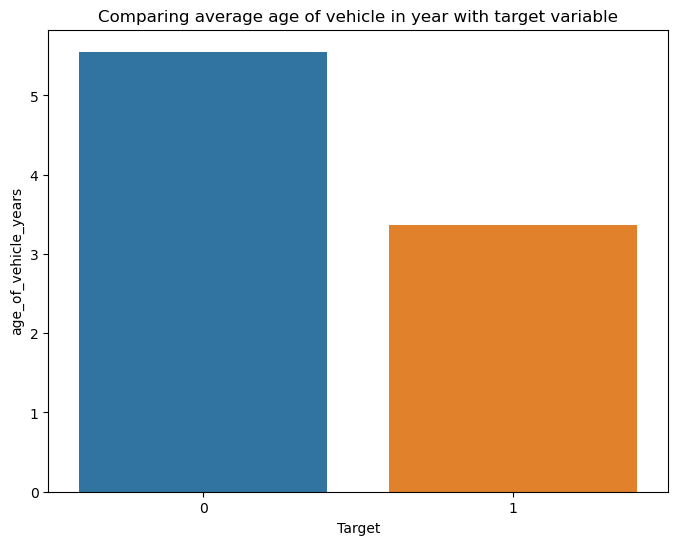

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(x="Target",y="age_of_vehicle_years",data=data,ci= False)
plt.title("Comparing average age of vehicle in year with target variable")
plt.show()

#####  age of vehicle is not directly related to target 

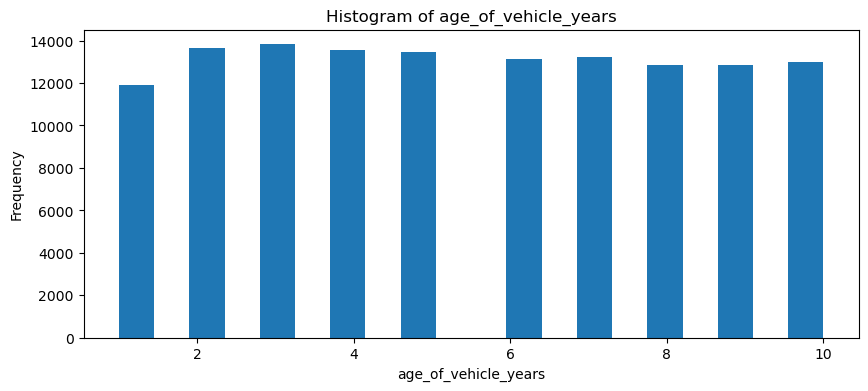

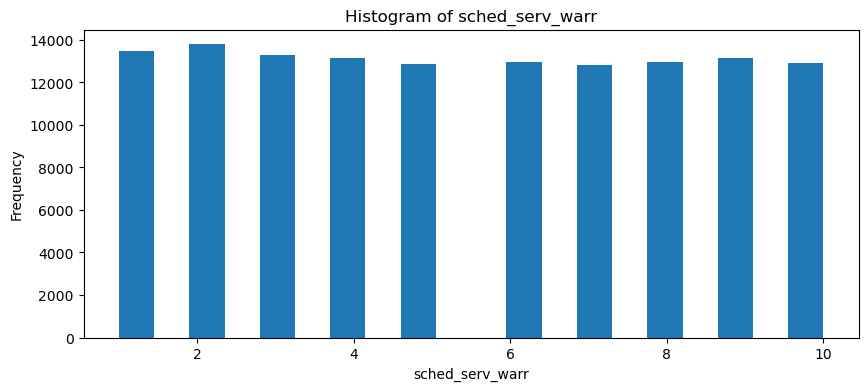

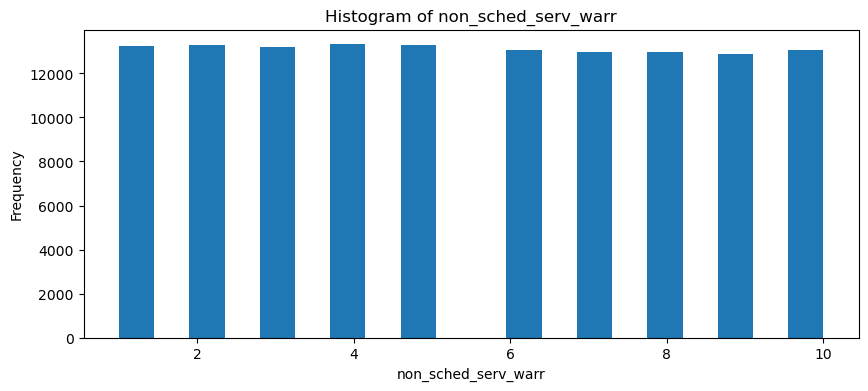

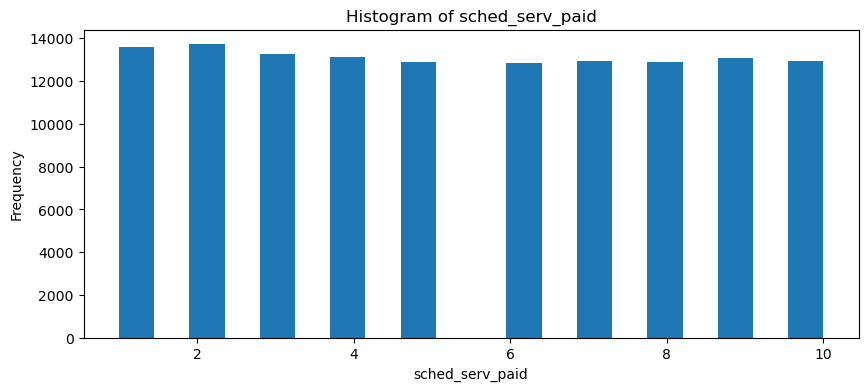

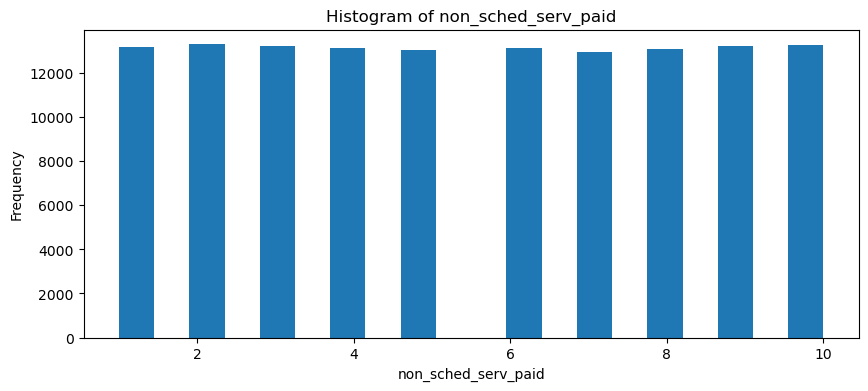

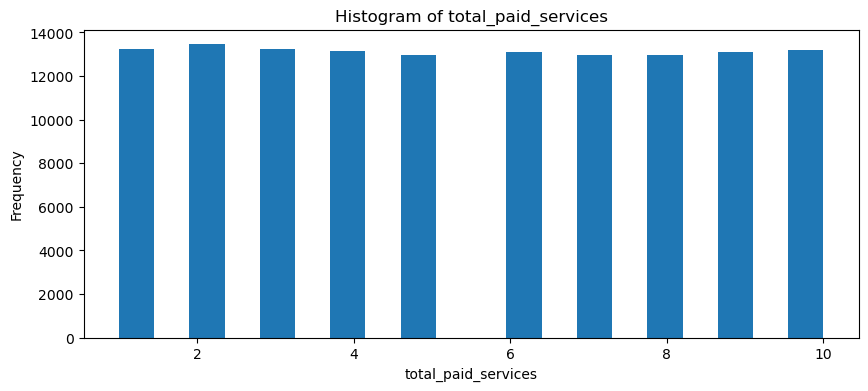

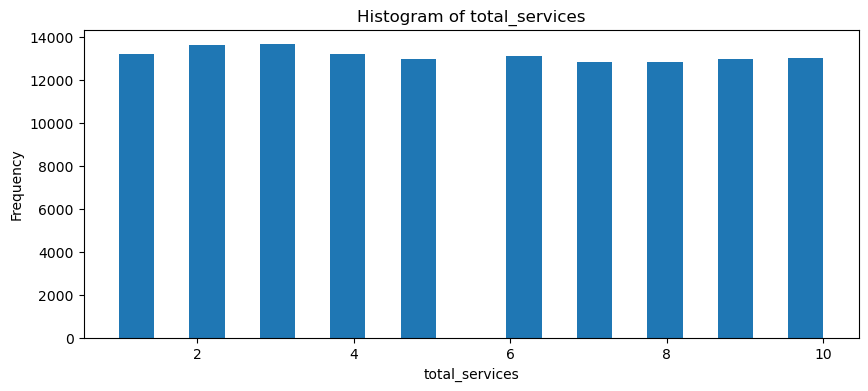

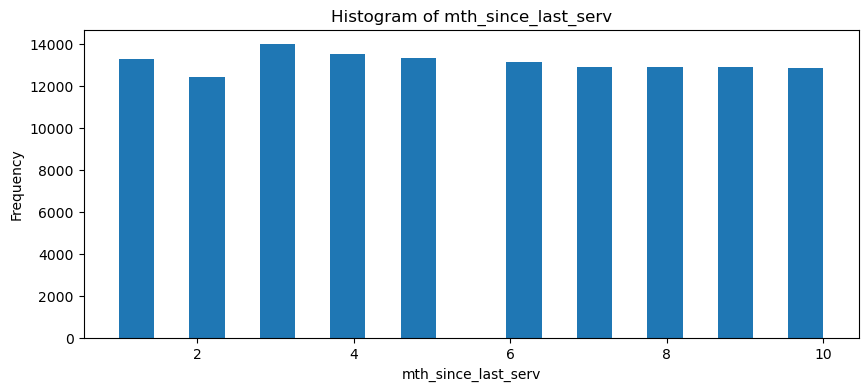

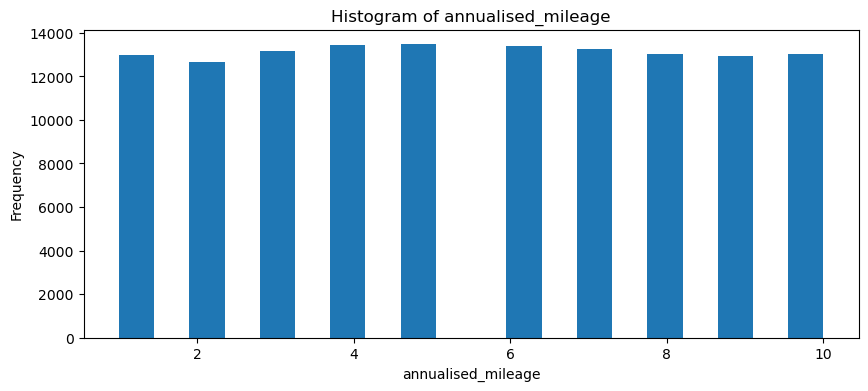

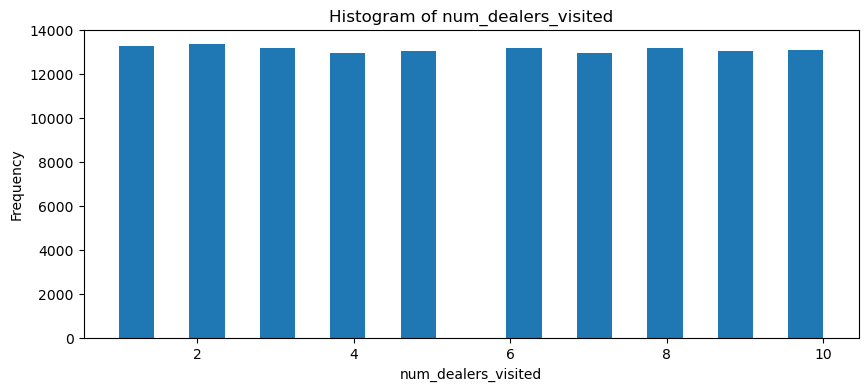

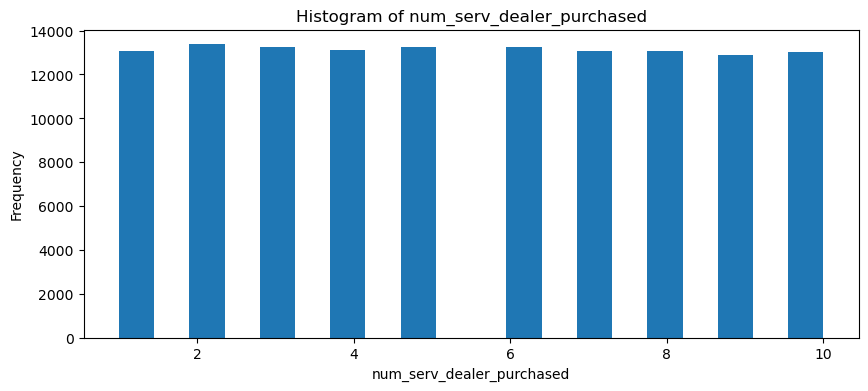

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


numerical_features = ['age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr', 
                      'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services', 
                      'total_services', 'mth_since_last_serv', 'annualised_mileage', 
                      'num_dealers_visited', 'num_serv_dealer_purchased']

# Create a histogram for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(10, 4))  # Adjust the size of the figure as needed
    data[feature].hist(bins=20)  # You can adjust the number of bins for better granularity
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(False)  # Turn off the grid for a cleaner plot
    plt.show()


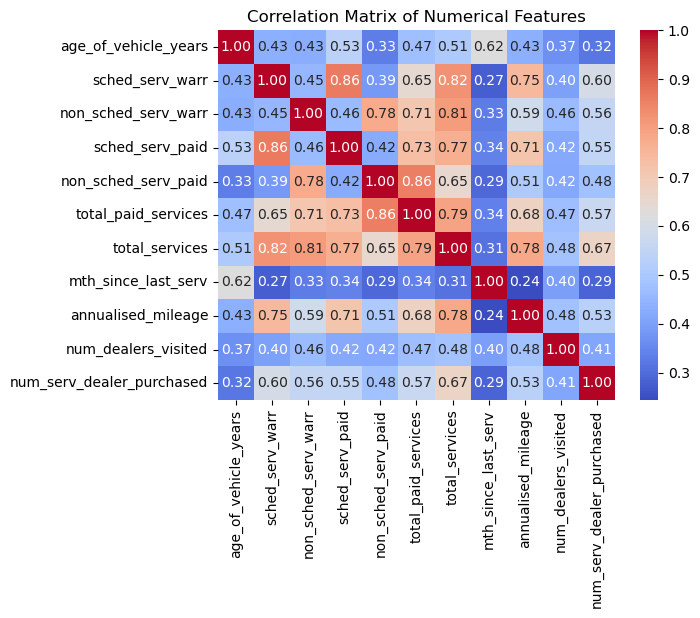

In [18]:
numerical_features = ['age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr', 'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services', 'total_services', 'mth_since_last_serv', 'annualised_mileage', 'num_dealers_visited', 'num_serv_dealer_purchased']

# Select only the numerical features from the DataFrame
numerical_data = data[numerical_features]

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

##### Correlation Matrix of Numerical Features'

### Categorial Features

In [19]:
# categorical summary
categorical_features = data.select_dtypes(include=['object'])

# Generate summary statistics for categorical features
categorical_summary = categorical_features.describe(include=['object']).transpose()
print(categorical_summary)

              count unique           top   freq
age_band      18962      7   4. 45 to 54   4058
gender        62029      2          Male  36072
car_model    131337     19       model_2  34491
car_segment  131337      4  Small/Medium  54553


In [20]:
from scipy.stats import chi2_contingency
categorical_features = ['age_band', 'gender', 'car_model', 'car_segment']

# Loop through each categorical feature
for feature in categorical_features:
    # Create a contingency table for the current feature and the target variable
    cross_tab = pd.crosstab(data[feature], data['Target'])
    
    # Print the cross-tabulation
    print("Cross-tabulation for", feature, "and Target:")
    print(cross_tab)
    
    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(cross_tab)
    
    # Print the results
    print("Chi-square statistic:", chi2)
    print("p-value:", p)
    print()

Cross-tabulation for age_band and Target:
Target          0   1
age_band             
1. <25        963   4
2. 25 to 34  3515  33
3. 35 to 44  3787  46
4. 45 to 54  4001  57
5. 55 to 64  3341  56
6. 65 to 74  2119  21
7. 75+       1007  12
Chi-square statistic: 15.182521519205954
p-value: 0.01888363579024306

Cross-tabulation for gender and Target:
Target      0    1
gender            
Female  25570  387
Male    35115  957
Chi-square statistic: 95.61951798583536
p-value: 1.392269835853039e-22

Cross-tabulation for car_model and Target:
Target         0    1
car_model            
model_1    14913  418
model_10    3170   45
model_11     603    9
model_12     608    6
model_13     675   39
model_14      78    0
model_15     324   10
model_16     110    4
model_17     151    2
model_18      96    5
model_19       2    0
model_2    33674  817
model_3    16407  667
model_4    14837  318
model_5    24092  582
model_6     3013   58
model_7     7871  296
model_8     6225  218
model_9      967  

#### The outcome suggests that all of the examined categorical features (age band, gender, car model, and car segment) are associated with  repurchase likelihood, with gender and car model showing particularly strong associations.

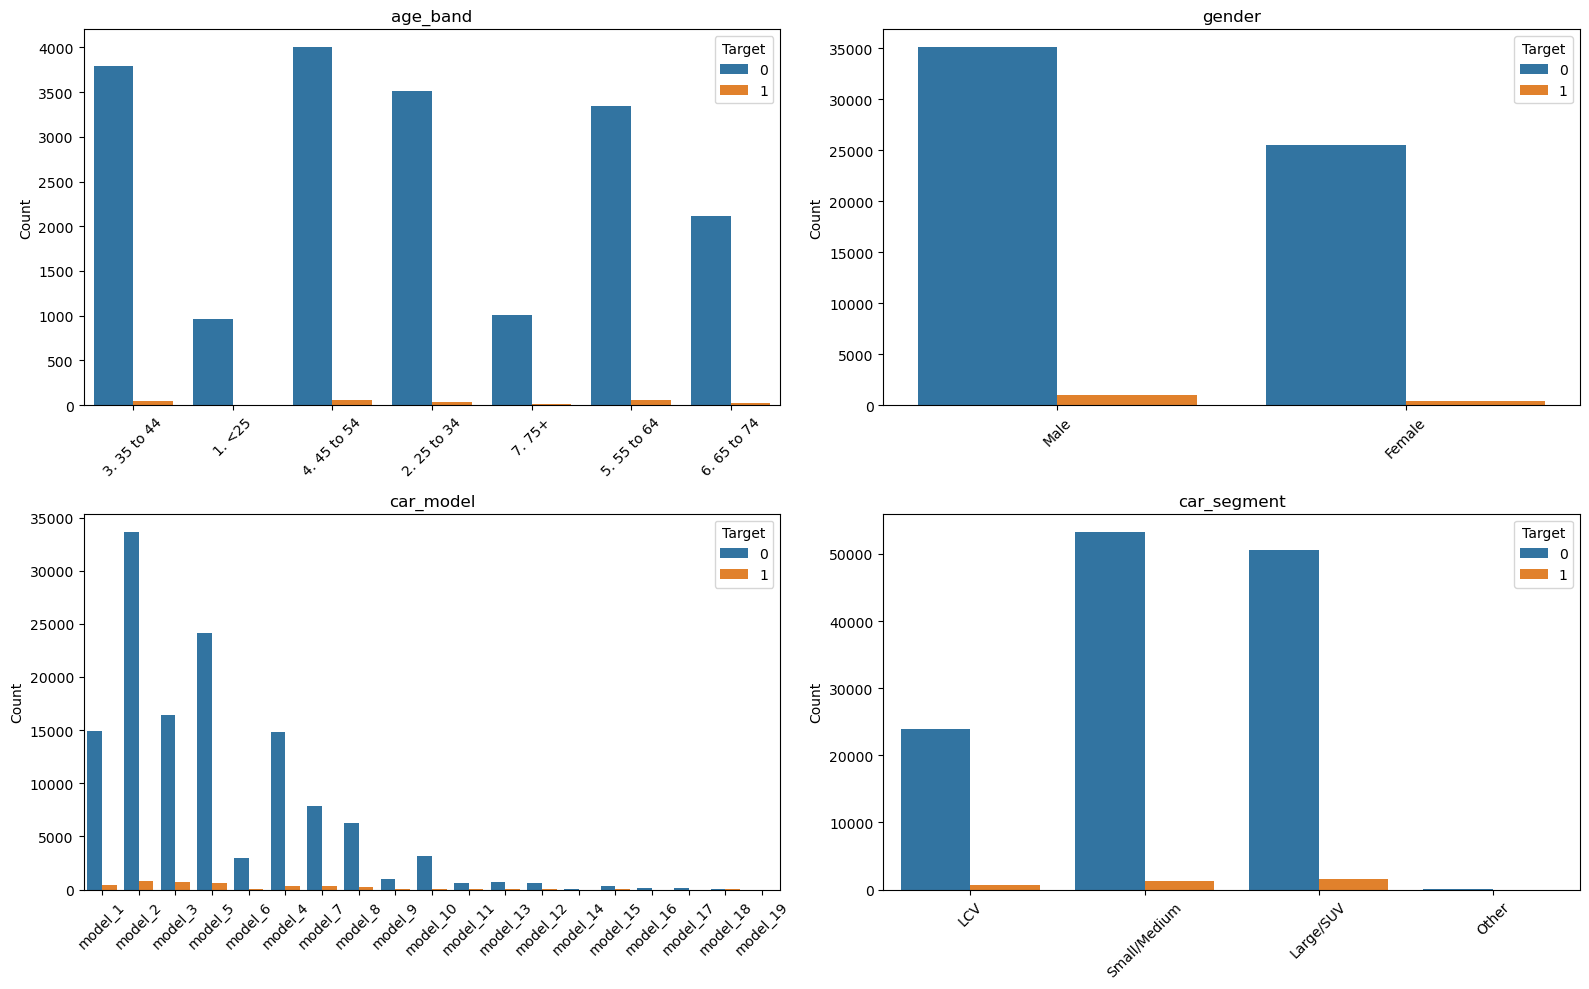

In [21]:
# Selecting categorical features
categorical_features = data.select_dtypes(include=['object'])

# Plotting bar plots for categorical features
plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_features.columns):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=data, x=col, hue='Target')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


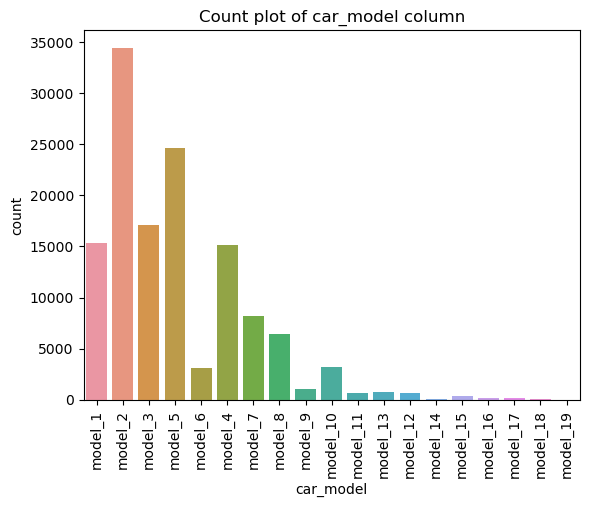

In [22]:
# count plot
sns.countplot(x='car_model', data=data)
sns.set_palette("Set3",10)
plt.title('Count plot of car_model column')
plt.xticks(rotation=90)
plt.show()

## 5. Prepare dataset

In [23]:
data.isnull()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
131333,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
131334,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
131335,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
data.isnull().sum()

ID                                0
Target                            0
age_band                     112375
gender                        69308
car_model                         0
car_segment                       0
age_of_vehicle_years              0
sched_serv_warr                   0
non_sched_serv_warr               0
sched_serv_paid                   0
non_sched_serv_paid               0
total_paid_services               0
total_services                    0
mth_since_last_serv               0
annualised_mileage                0
num_dealers_visited               0
num_serv_dealer_purchased         0
dtype: int64

In [25]:
# Assigning a new category for missing values in 'age_band' and 'gender'
data['age_band'].fillna('Unknown', inplace=True)
data['gender'].fillna('Unknown', inplace=True)


data.isnull().sum()

ID                           0
Target                       0
age_band                     0
gender                       0
car_model                    0
car_segment                  0
age_of_vehicle_years         0
sched_serv_warr              0
non_sched_serv_warr          0
sched_serv_paid              0
non_sched_serv_paid          0
total_paid_services          0
total_services               0
mth_since_last_serv          0
annualised_mileage           0
num_dealers_visited          0
num_serv_dealer_purchased    0
dtype: int64

Checking if the NaN values were changed to 'Unknown'.

In [26]:
data.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,Unknown,Unknown,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,Unknown,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,Unknown,Unknown,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,Unknown,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


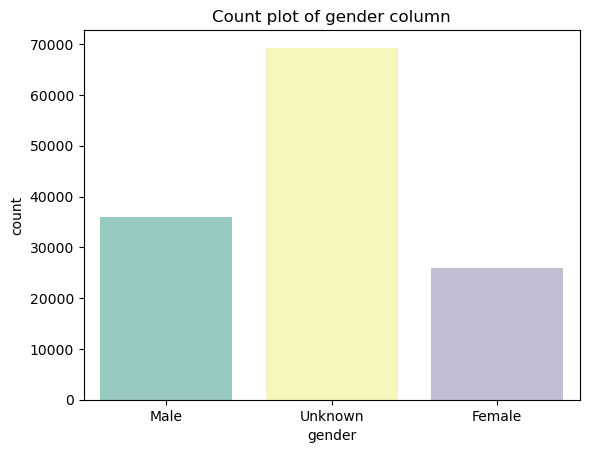

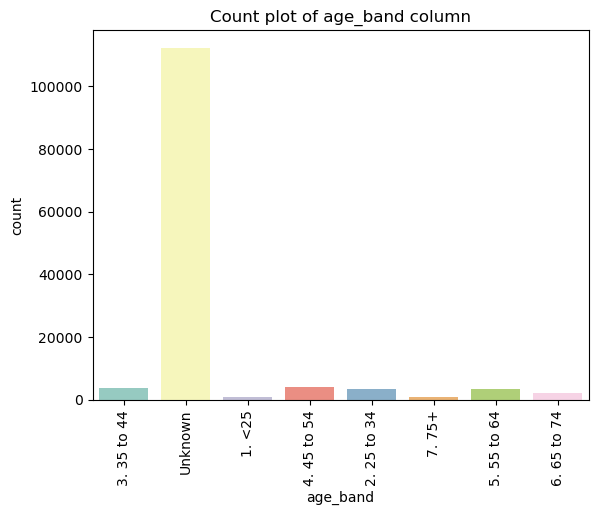

In [27]:
# count plot
sns.countplot(x='gender', data=data)
plt.title('Count plot of gender column')
plt.show()

# count plot
sns.countplot(x='age_band', data=data)
sns.set_palette("Set3",10)
plt.title('Count plot of age_band column')
plt.xticks(rotation=90)
plt.show()

#### From chi_sq test, gender and car_model can be considered to be contributor for repruchase of car. 
#### columns like age_band has high number of unkown counts compared to other values of counts and ID columns does not directly 
#### contribute in model prediction therefore the two columns are dropped 

In [28]:
# dropping the age_band column as it is having alot of null
data.drop('age_band', axis=1, inplace=True)
data.drop('ID', axis=1, inplace=True)

In [29]:
data.head()

,Target,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,0,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,0,Unknown,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,0,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,0,Unknown,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,0,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


In [30]:
data_new = data.copy()

# Initialize the LabelEncoder
le = LabelEncoder()

# Loop through each column in the DataFrame
for column in data_new.columns:
    if data_new[column].dtype == 'object':  # Checking if the column is of type object (string)
        # Apply Label Encoding to the column
        data_new[column] = le.fit_transform(data_new[column])

# Check the transformed data
data_new.head()


,Target,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,0,1,0,0,9,2,10,3,7,5,6,9,8,10,4
1,0,2,11,3,6,10,3,10,4,9,10,6,10,7,10
2,0,1,12,1,9,10,9,10,9,10,10,7,10,6,10
3,0,2,12,1,5,8,5,8,4,5,6,4,10,9,7
4,0,0,11,3,8,9,4,10,7,9,8,5,4,4,9


#### all the categorical features are changed into numerical values. ex - car_model, gender  

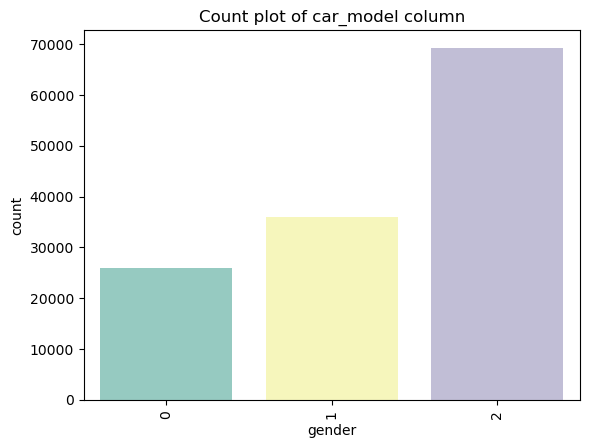

In [31]:
# count plot
sns.countplot(x='gender', data=data_new)
sns.set_palette("Set3",10)
plt.title('Count plot of car_model column')
plt.xticks(rotation=90)
plt.show()

### 6. Split the data into train and test sets


In [32]:
# Split the data into training and testing sets
X = data_new.drop("Target", axis=1)
y = data_new["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Output the shape of the scaled arrays to confirm transformation
X_train_scaled.shape, X_test_scaled.shape

((105069, 14), (26268, 14))

### 7. Train the model

In [52]:
# Initialize the KNeighbors classifier
knn = KNeighborsClassifier()

# Fit the model on the scaled training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [54]:
# Predict on the scaled test data
y_pred = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Class Report:', class_report)

Accuracy: 0.9878178772651135
Class Report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99     25608
           1       0.91      0.57      0.70       660

    accuracy                           0.99     26268
   macro avg       0.95      0.78      0.85     26268
weighted avg       0.99      0.99      0.99     26268



Accuracy: The model achieved an accuracy of approximately 98.78% on the test set.
Classification Report:
For class '0' (non-repurchase):
Precision: 99%
Recall: 100%
F1-Score: 99%
For class '1' (repurchase):
Precision: 91%
Recall: 57%
F1-Score: 70%
Overall Metrics:
Macro Average Precision: 95%
Macro Average Recall: 78%
Macro Average F1-Score: 85%
Weighted Average Metrics reflect similar high values due to the class imbalance, with most instances belonging to class '0'.

In [58]:
# Predictions from the initial model 
initial_conf_matrix = confusion_matrix(y_test, y_pred)
print('initial_conf_matrix:', initial_conf_matrix)

initial_conf_matrix: [[25573    35]
 [  285   375]]


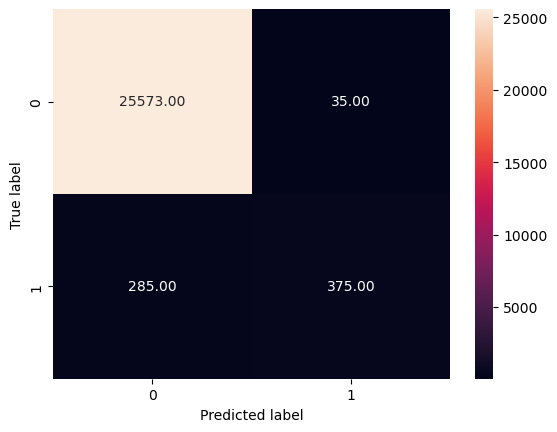

In [44]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt=".2f")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### 8. Grid Search with KNN

In [41]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid for Randomized Search
param_dist = {
    'n_neighbors': np.arange(3, 16),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the RandomizedSearchCV with fewer iterations to manage execution time
rnd_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', verbose=1, random_state=42)

# Fit the RandomizedSearchCV to the scaled training data
rnd_search.fit(X_train_scaled, y_train)

# Retrieve the best parameters and the best score from the RandomizedSearch
best_params_rnd = rnd_search.best_params_
best_score_rnd = rnd_search.best_score_

print(best_params_rnd) 
print(best_score_rnd)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


({'weights': 'distance', 'n_neighbors': 4, 'metric': 'euclidean'},
 0.9871322674518869)

#### Result 
Best Parameters:
n_neighbors: The optimal number of neighbors found.
weights: Whether 'uniform' or 'distance' weights were found to be more effective.
metric: Which distance metric (either 'euclidean' or 'manhattan') yielded the best results.
Best Score: The highest accuracy achieved on the cross-validation sets.
Let's look at the specific values for these optimal parameters and the best score achieved:

Best Parameters: 
’metric’:
’metric’: 
’euclidean’, ’n_neighbors’: 5, ’weights’: ’distance’
’euclidean’, ’n_neighbors’: 5, ’weights’: ’distance’
Best Score:
98.78%


### 9. Assess Model Performance

In [60]:
# Retrain the KNN model using the optimal parameters found from the randomized search
optimal_knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')

# Fit the model on the scaled training data
optimal_knn.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_optimal = optimal_knn.predict(X_test_scaled)

# Calculate accuracy
optimal_accuracy = accuracy_score(y_test, y_pred_optimal)

# Generate a classification report
optimal_class_report = classification_report(y_test, y_pred_optimal)

print('Accuracy:',optimal_accuracy)
print('Class Reprt:',optimal_class_report)


Accuracy: 0.9878559463986599
Class Reprt:               precision    recall  f1-score   support

           0       0.99      1.00      0.99     25608
           1       0.92      0.57      0.70       660

    accuracy                           0.99     26268
   macro avg       0.95      0.78      0.85     26268
weighted avg       0.99      0.99      0.99     26268



In [46]:
# Predictions from the optimized model 
optimized_conf_matrix = confusion_matrix(y_test, y_pred_optimal)
print(optimized_conf_matrix)

[[25574    34]
 [  285   375]]


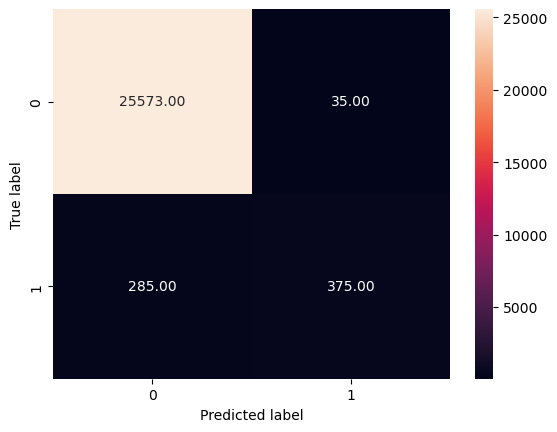

In [49]:
# Plot the confusion matrix
optimized_conf_matrix = confusion_matrix(y_test, y_pred_optimal)
sns.heatmap(cm,annot=True,fmt=".2f")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

Both models perform similarly, with the optimized model making one fewer false positive prediction than the initial model.
The number of true positives and false negatives remains the same in both models. This indicates that the tuning had a minimal impact on the model's ability to correctly predict the minority class (repurchase), which is consistent with the recall staying the same.
The very slight improvement in reducing false positives in the optimized model may not significantly impact the overall effectiveness but shows a marginal enhancement in specificity (not mistakenly labeling non-repurchase as repurchase).